# 🚀 Guia de Análise de Dados com Python: Estudo de Caso (CRISP-DM)

Olá! Bem-vindo à nossa aula prática de análise e visualização de dados. Hoje, vamos aplicar os conceitos que aprendemos em um projeto real, usando uma metodologia padrão de mercado chamada CRISP-DM.

Nosso objetivo é analisar um dataset que simula os padrões de tempo de tela de crianças e adolescentes na Índia, buscando entender os hábitos, os impactos na saúde e as diferenças demográficas.

**Metodologia:** CRISP-DM

Vamos seguir as 3 primeiras fases deste ciclo:
1. Entendimento do Negócio: Definir o problema e os objetivos.
2. Entendimento dos Dados: Carregar e explorar o dataset.
3. Preparação dos Dados: Limpar, otimizar e transformar os dados para análise.

Ao final, faremos a Análise Exploratória e a Visualização para responder às nossas perguntas.

# 💼 Fase 1: Entendimento do Negócio

**Contexto:** O tempo de tela entre crianças e adolescentes na Índia aumentou drasticamente, especialmente após a pandemia. Estudos indicam que o uso excessivo está correlacionado a problemas de sono, ansiedade e risco de obesidade. Uma organização de saúde pública quer entender melhor esses padrões para criar campanhas de conscientização eficazes.

**Objetivos do Projeto:**
1. Identificar os principais fatores que influenciam o tempo de tela (idade, gênero, localidade).
2. Analisar a relação entre o tempo de tela e os impactos negativos na saúde.
3. Verificar se o uso para fins educacionais e recreativos varia com a idade.
4. Gerar visualizações claras para comunicar os achados para as equipes de saúde.

**Pergunta Central:** Quais são os perfis de crianças e adolescentes com maior risco associado ao tempo de tela excessivo?

# 📊 Fase 2: Entendimento dos Dados (Parte 1)

Nesta fase, nosso trabalho é carregar os dados e fazer uma exploração inicial para entender sua estrutura, qualidade e características principais.

Vamos começar importando as bibliotecas necessárias e carregando o arquivo Indian_Kids_Screen_Time.csv.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Define um tamanho padrão para as figuras

In [3]:
# Carregar o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('Indian_Kids_Screen_Time.csv')
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [4]:
print("--- 5 Primeiras Linhas do DataFrame ---")
display(df.head())
print("\n--- 5 Últimas Linhas do DataFrame ---")
display(df.tail())
print("\n--- 5 linhas Aleatórias do DataFrame ---")
display(df.sample(5))

--- 5 Primeiras Linhas do DataFrame ---


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban



--- 5 Últimas Linhas do DataFrame ---


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban



--- 5 linhas Aleatórias do DataFrame ---


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
5392,14,Female,3.74,Laptop,True,0.33,"Eye Strain, Anxiety, Obesity Risk",Rural
5271,14,Female,4.17,Smartphone,True,0.33,"Poor Sleep, Eye Strain",Urban
2282,11,Female,4.00,TV,True,0.48,Poor Sleep,Rural
9146,10,Male,4.65,TV,True,0.40,Poor Sleep,Urban
4466,17,Male,4.86,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Urban


In [5]:
# Obter um resumo técnico: tipos de dados, contagem de nulos e uso de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


Colunas com tipo de dado 'object' armazenam referências para os dados reais (como strings), portanto o uso de memória padrão não reflete o tamanho real ocupado. Para calcular o uso de memória real, incluindo o conteúdo referenciado, usamos memory_usage='deep'.

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 2.3 MB


In [7]:
# Obter estatísticas descritivas para as colunas numéricas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,9712.0,NaN,NaN,NaN,12.979201,3.162437,8.0,10.0,13.0,16.0,18.0
Gender,9712,2,Male,4942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Daily_Screen_Time_hr,9712.0,NaN,NaN,NaN,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Primary_Device,9712,4,Smartphone,4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exceeded_Recommended_Limit,9712,2,True,8301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Educational_to_Recreational_Ratio,9712.0,NaN,NaN,NaN,0.427226,0.073221,0.3,0.37,0.43,0.48,0.6
Health_Impacts,6494,15,Poor Sleep,2268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Urban_or_Rural,9712,2,Urban,6851,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9712.0,12.979201,3.162437,8.0,10.00,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9712.0,0.427226,0.073221,0.3,0.37,0.43,0.48,0.60


In [9]:
df['Gender'].value_counts()

Gender
Male      4942
Female    4770
Name: count, dtype: int64

In [10]:
df['Primary_Device'].value_counts()

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

In [11]:
df['Health_Impacts'].value_counts()

Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

Essa característica representa uma lista de problemas, o que explica a presença de valores ausentes. Esses valores ocorrem quando a criança não apresenta nenhum dos problemas listados, tornando inadequado preenchê-los com um valor padrão.

In [12]:
df['Urban_or_Rural'].value_counts()

Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64

In [13]:
df.corr(method='pearson', numeric_only=True)

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.118328,0.159173,-0.488617
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000


In [14]:
df.corr(method='spearman', numeric_only=True)

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.105310,0.158879,-0.464165
Avg_Daily_Screen_Time_hr,0.105310,1.000000,0.598739,-0.073692
Exceeded_Recommended_Limit,0.158879,0.598739,1.000000,-0.121284
Educational_to_Recreational_Ratio,-0.464165,-0.073692,-0.121284,1.000000


# 🛠️ Fase 3: Preparação dos Dados

Esta é a etapa mais trabalhosa, onde vamos limpar, transformar e enriquecer os dados para que fiquem prontos para uma análise aprofundada e para a modelagem.

Ajustar os tipos de dados (Dtypes) é crucial para trabalhar com datasets maiores, pois reduz o consumo de RAM e acelera o processamento.

**Estratégias:**
1. **Dados Categóricos:** Colunas de texto com poucos valores únicos (Gender, Primary_Device, etc.) são perfeitas para o tipo category.
2. **Booleanos:** A coluna Exceeded_Recommended_Limit (True/False) pode ser convertida para bool.
3. **Números:** Podemos reduzir a precisão de float64 para float32 e de int64 para int8 (já que a idade vai de 8 a 18), economizando espaço.

In [15]:
print(f"Uso de memória ANTES da otimização (Real): {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Uso de memória ANTES da otimização (Padrão): {df.memory_usage(deep=False).sum() / 1024:.2f} KB")

Uso de memória ANTES da otimização (Real): 2305.49 KB
Uso de memória ANTES da otimização (Padrão): 540.74 KB


In [16]:
# Converter colunas de texto para o tipo 'category'
for col in ['Gender', 'Primary_Device', 'Urban_or_Rural']:
    df[col] = df[col].astype('category')

print(f"Uso de memória DEPOIS de converter para 'category' (Real): {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Uso de memória DEPOIS de converter para 'category' (Padrão): {df.memory_usage(deep=False).sum() / 1024:.2f} KB")

Uso de memória DEPOIS de converter para 'category' (Real): 780.83 KB
Uso de memória DEPOIS de converter para 'category' (Padrão): 342.01 KB


Como visto anteriormente, o Health_Impacts é uma lista de problemas, o que faz a conversão direta para category não ser adequada. Vamos usar a técnica de One-Hot Encoding para criar colunas binárias para cada problema listado.

In [17]:
# Criando one-hot encoding para a coluna 'Health_Impacts'
health_impact_dummies = df['Health_Impacts'].str.get_dummies(sep=', ')
df = pd.concat([df, health_impact_dummies], axis=1)
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Anxiety,Eye Strain,Obesity Risk,Poor Sleep
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,0,1,0,1
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,0,0,0,1
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,0,0,0,1
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,0,0,0,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban,0,0,0,1
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural,0,0,0,1
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,1,1,0,1
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,0,0,0,1


In [18]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int64   
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float64 
 6   Health_Impacts                     6494 non-null   object  
 7   Urban_or_Rural                     9712 non-null   category
 8   Anxiety                            9712 non-null   int64   
 9   Eye Strain                         9712 non-null   int64   
 10  Obesity Risk                       9712 non-null   int64   
 11  Poor Sleep                         9712 non

Observe que o uso de memória na verdade aumentou. Isso acontece porque o tipo dessas colunas está como inteiro e não como booleano. Vamos corrigir isso.

In [19]:
df[[col for col in health_impact_dummies.columns]] = df[[col for col in health_impact_dummies.columns]].astype(bool)
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Anxiety,Eye Strain,Obesity Risk,Poor Sleep
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,False,True,False,True
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,False,False,False,True
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,False,False,False,True
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,False,False,False,False
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban,False,False,False,True
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural,False,False,False,True
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,True,True,False,True
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,False,False,False,True


In [20]:
# Não precisamos mais da coluna original, então podemos removê-la
df = df.drop(columns=['Health_Impacts'])

In [21]:
print("Uso de memória FINAL (Real): {:.2f} KB".format(df.memory_usage(deep=True).sum() / 1024))
print("Uso de memória FINAL (Padrão): {:.2f} KB".format(df.memory_usage(deep=False).sum() / 1024))

Uso de memória FINAL (Real): 304.43 KB
Uso de memória FINAL (Padrão): 304.07 KB


In [22]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int64   
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float64 
 6   Urban_or_Rural                     9712 non-null   category
 7   Anxiety                            9712 non-null   bool    
 8   Eye Strain                         9712 non-null   bool    
 9   Obesity Risk                       9712 non-null   bool    
 10  Poor Sleep                         9712 non-null   bool    
dtypes: bool(5), category(3), float64(2), int64(

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9712.0,12.979201,3.162437,8.0,10.00,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9712.0,0.427226,0.073221,0.3,0.37,0.43,0.48,0.60


Observando os valores numéricos, podemos observar que:
1. A idade varia de 8 a 18 anos. Dessa forma, armazenar como um int64 é um desperdício (-9223372036854775808 a 9223372036854775807). Podemos usar int8 (-128 a 127).
2. As duas colunas de ponto flutuante (Avg_Daily_Screen_Time_Hours e Educational_to_Recreational_Ratio) não precisam de tanta precisão (2 casas decimais). Podemos convertê-las para float32.

In [24]:
# Otimizar colunas numéricas (downcasting)
df['Age'] = df['Age'].astype('int8')
df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].astype('float32')
df['Educational_to_Recreational_Ratio'] = df['Educational_to_Recreational_Ratio'].astype('float32')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int8    
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float32 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float32 
 6   Urban_or_Rural                     9712 non-null   category
 7   Anxiety                            9712 non-null   bool    
 8   Eye Strain                         9712 non-null   bool    
 9   Obesity Risk                       9712 non-null   bool    
 10  Poor Sleep                         9712 non-null   bool    
dtypes: bool(5), category(3), float32(2), int8(1

Nosso conjunto de dados agora está otimizado para análise e ocupa apenas 7% do espaço original! O que pode causar uma grande diferença em datasets maiores.

In [27]:
# df.to_parquet('Indian_Kids_Screen_Time_Optimized.parquet', index=False)

In [29]:
#df_parquet = pd.read_parquet('Indian_Kids_Screen_Time_Optimized.parquet')
#df_parquet.info(memory_usage='deep')

In [30]:
df.to_csv('Indian_Kids_Screen_Time_Optimized.csv', index=False)

# 📊 Fase 2: Entendimento dos Dados (Parte 2)

## Análise Univariada (Explorando uma única variável)

### Histograma
- O que é? Um gráfico que mostra a distribuição de frequência de dados numéricos, agrupando-os em intervalos.
- Nosso Objetivo: Entender a distribuição das idades e do tempo médio de tela para identificar as faixas mais comuns no nosso dataset.

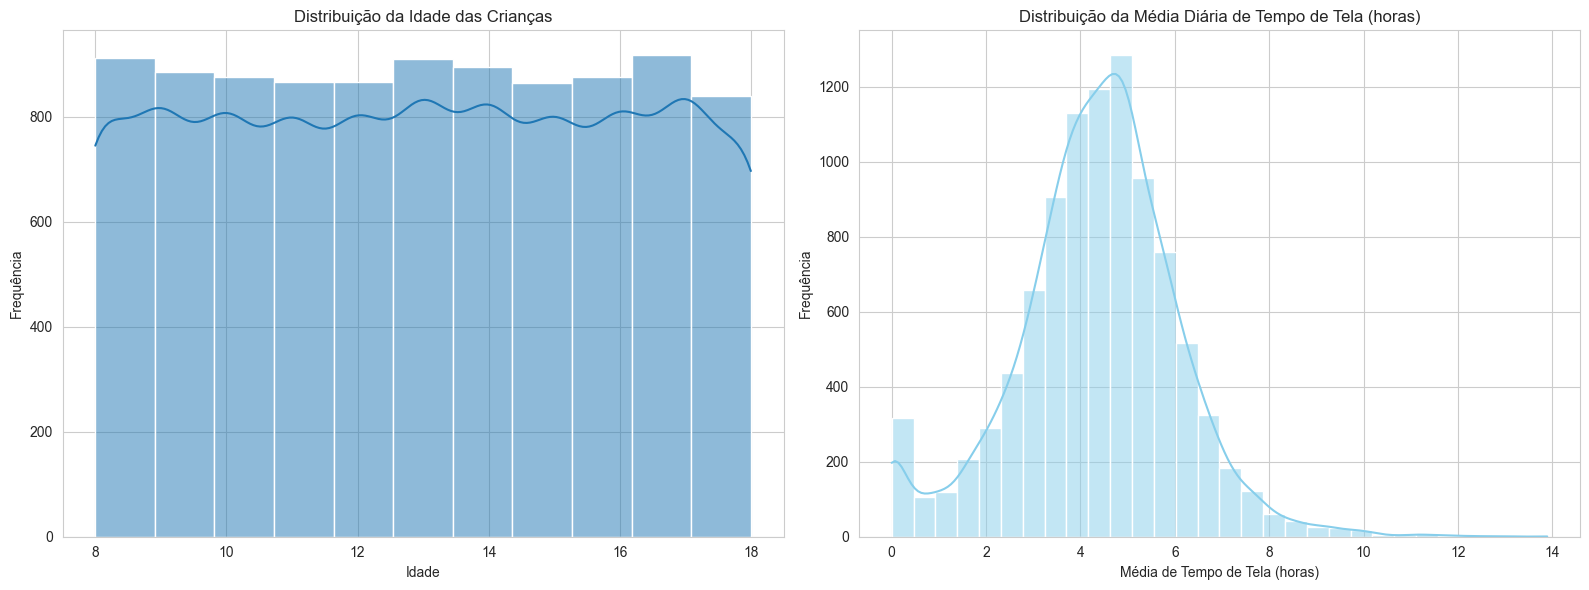

In [30]:
# Criando uma figura com dois subplots (um ao lado do outro)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para a variável 'Age'
sns.histplot(df['Age'], bins=11, kde=True, ax=axes[0])
axes[0].set_title('Distribuição da Idade das Crianças')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# Histograma para a variável 'Avg_Daily_Screen_Time_hr'
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Distribuição da Média Diária de Tempo de Tela (horas)')
axes[1].set_xlabel('Média de Tempo de Tela (horas)')
axes[1].set_ylabel('Frequência')

# Ajusta o layout para não haver sobreposição
plt.tight_layout()
plt.show()


### Box Plot

- O que é? Um Box Plot que exibe a distribuição de múltiplas variáveis numéricas lado a lado, facilitando a comparação de suas escalas e distribuições.
- Nosso Objetivo: Observar e comparar a escala e a dispersão de todas as nossas variáveis numéricas (Age, Avg_Daily_Screen_Time_hr, Educational_to_Recreational_Ratio) em um único local.

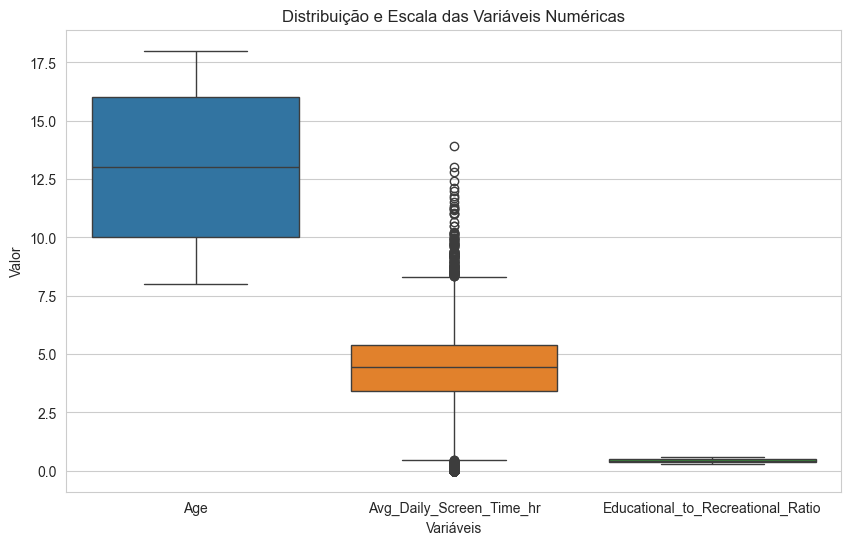

In [31]:
# Seleciona apenas as colunas numéricas de interesse
numerical_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']

# Cria o box plot usando seaborn
sns.boxplot(data=df[numerical_cols])
plt.title('Distribuição e Escala das Variáveis Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variáveis')
plt.show()


In [32]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------  8.7/8.7 MB 47.3 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 40.3 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ------------- -------------------------- 12.8/38.5 MB 60.7 MB/s eta 0:00:01
   ---------------------- ----------------- 21.5/38.5 MB 52.1 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 62.4 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 54.2 MB/s  0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   -

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Aplicando StandardScaler
df_standard_scaled = df[numerical_cols].copy()
df_standard_scaled[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

# Aplicando MinMaxScaler
df_minmax_scaled = df[numerical_cols].copy()
df_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

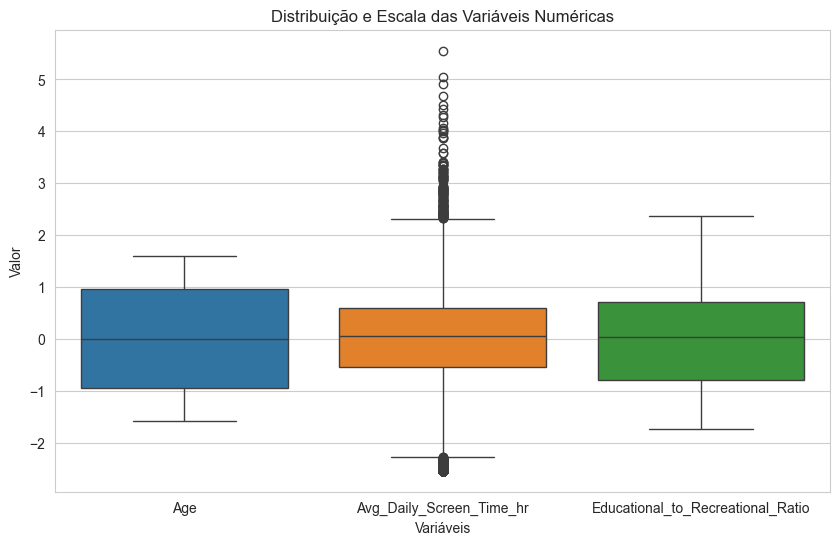

In [37]:
sns.boxplot(data=df_standard_scaled[numerical_cols])
plt.title('Distribuição e Escala das Variáveis Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variáveis')
plt.show()

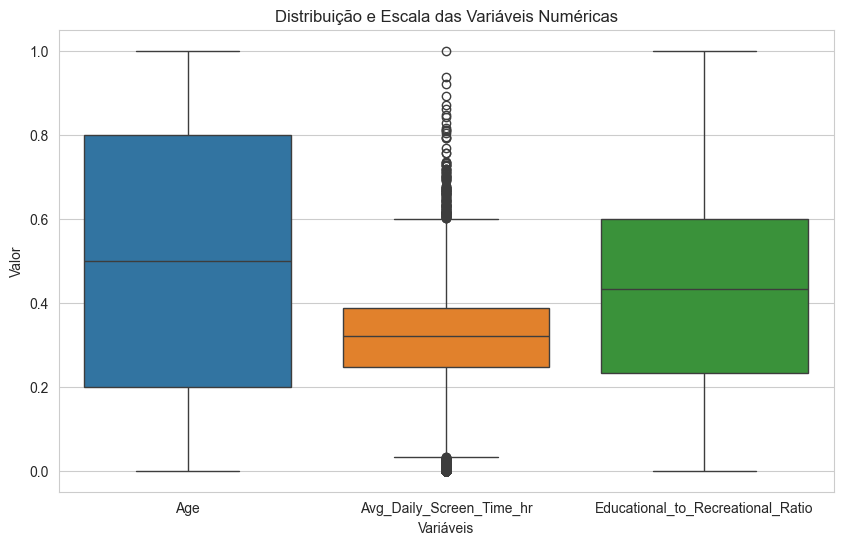

In [39]:
sns.boxplot(data=df_minmax_scaled[numerical_cols])
plt.title('Distribuição e Escala das Variáveis Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variáveis')
plt.show()

### Gráfico de Barras (Contagem Categórica)

- O que é? Um gráfico de barras que mostra a contagem de cada categoria em uma variável.
- Nosso Objetivo: Visualizar qual o dispositivo principal mais comum e a distribuição de gênero no dataset.

C:\Users\joaov\AppData\Local\Temp\ipykernel_6564\1282654382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Primary_Device', data=df, ax=axes[0], palette='viridis', order = df['Primary_Device'].value_counts().index)
C:\Users\joaov\AppData\Local\Temp\ipykernel_6564\1282654382.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[1], palette='plasma')


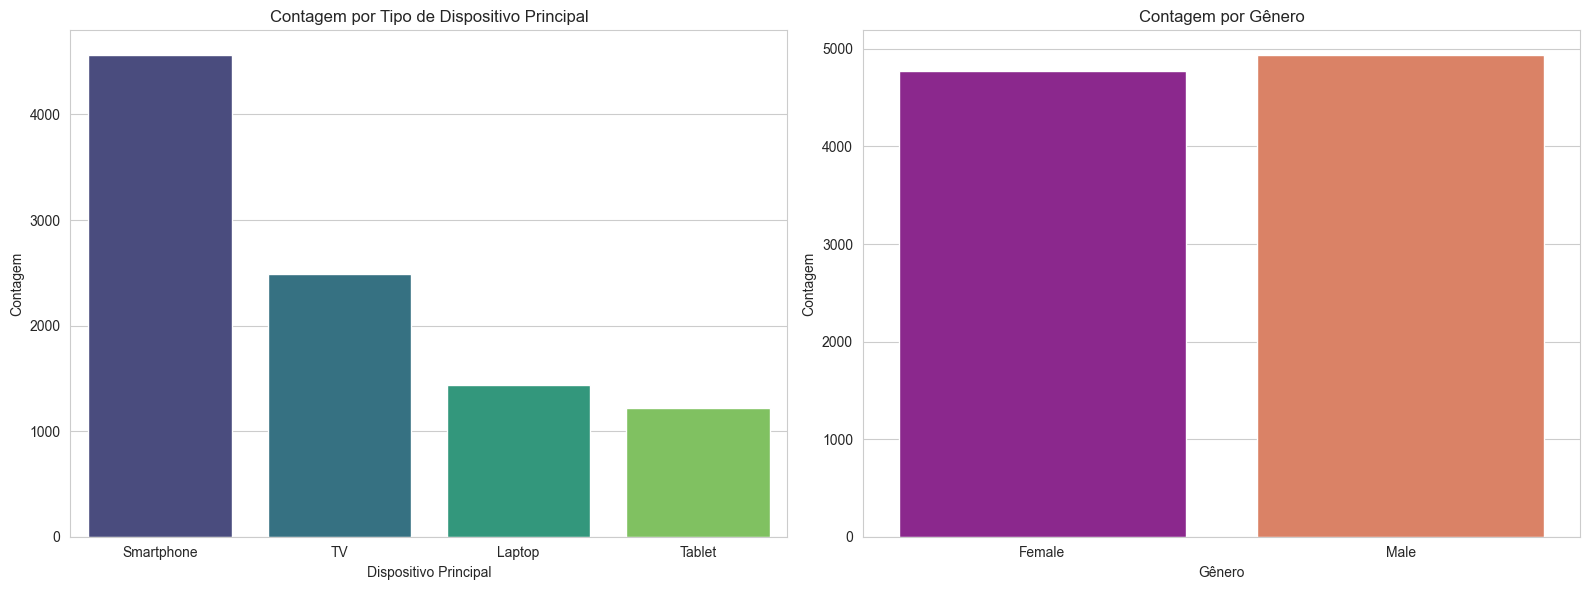

In [40]:
# Criando uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Barras para 'Primary_Device'
sns.countplot(x='Primary_Device', data=df, ax=axes[0], palette='viridis', order = df['Primary_Device'].value_counts().index)
axes[0].set_title('Contagem por Tipo de Dispositivo Principal')
axes[0].set_xlabel('Dispositivo Principal')
axes[0].set_ylabel('Contagem')

# Gráfico de Barras para 'Gender'
sns.countplot(x='Gender', data=df, ax=axes[1], palette='plasma')
axes[1].set_title('Contagem por Gênero')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


## Análise Bivariada (Relação entre Duas Variáveis)

### Célula 5: Box Plots Agrupados (Numérica vs. Categórica)

- O que é? Uma série de Box Plots para comparar a distribuição de uma variável numérica entre diferentes grupos.
- Nosso Objetivo: Comparar a Média Diária de Tempo de Tela (Avg_Daily_Screen_Time_hr) entre Gêneros (Gender).

C:\Users\joaov\AppData\Local\Temp\ipykernel_6564\3215290621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='pastel')


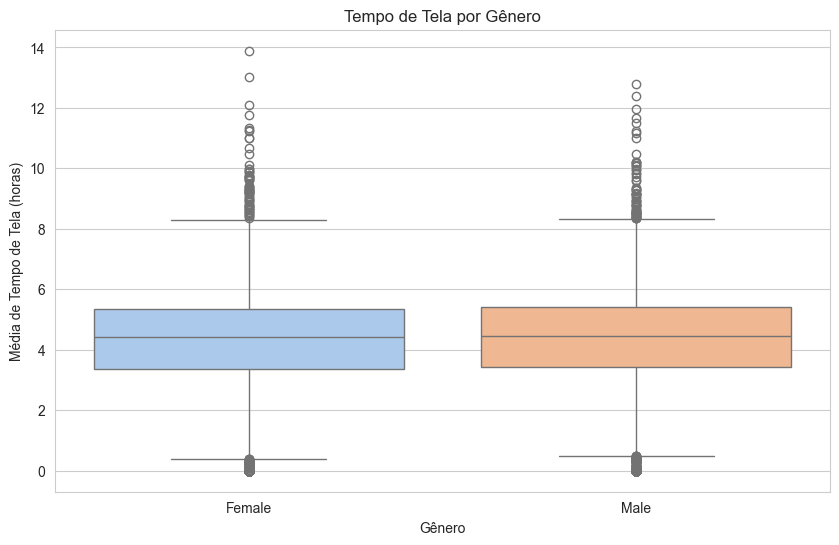

In [41]:
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='pastel')
plt.title('Tempo de Tela por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Tempo de Tela (horas)')
plt.show()


### Gráfico de Dispersão (Numérica vs. Numérica)

- O que é? Um gráfico que usa pontos para mostrar a relação entre duas variáveis numéricas.
- Nosso Objetivo: Investigar se existe uma correlação entre a Idade (Age) e a Média Diária de Tempo de Tela (Avg_Daily_Screen_Time_hr).

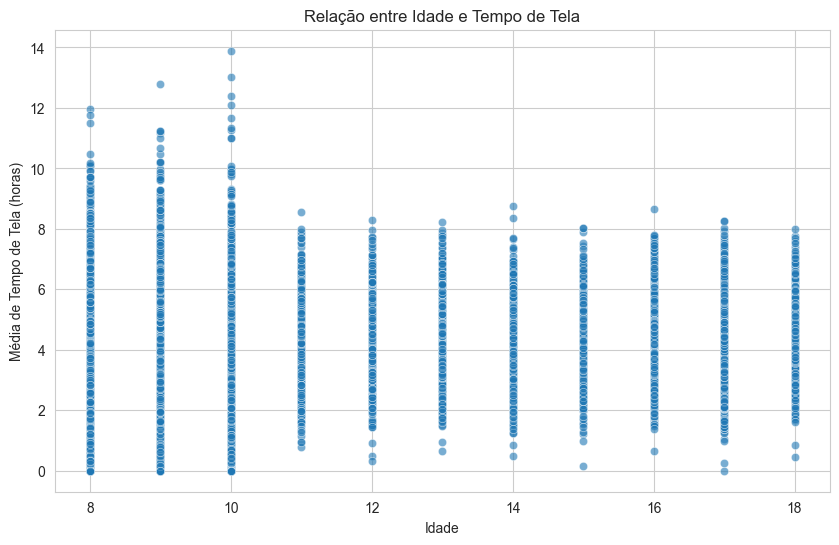

In [42]:
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, alpha=0.6)
plt.title('Relação entre Idade e Tempo de Tela')
plt.xlabel('Idade')
plt.ylabel('Média de Tempo de Tela (horas)')
plt.show()


### Gráfico de Barras Agrupadas (Categórica vs. Categórica)

- O que é? Um gráfico de barras que compara a contagem de uma variável categórica através das categorias de uma segunda variável.
- Nosso Objetivo: Entender se o tipo de Dispositivo Principal (Primary_Device) varia entre as áreas Urbana ou Rural (Urban_or_Rural).

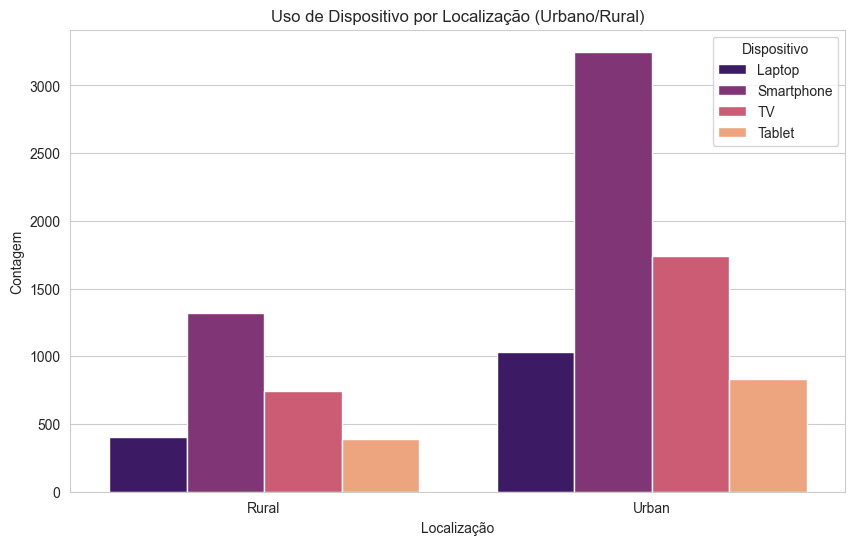

In [43]:
sns.countplot(x='Urban_or_Rural', hue='Primary_Device', data=df, palette='magma')
plt.title('Uso de Dispositivo por Localização (Urbano/Rural)')
plt.xlabel('Localização')
plt.ylabel('Contagem')
plt.legend(title='Dispositivo')
plt.show()


## Análise Multivariada (Relação entre Três ou Mais Variáveis)

### Gráfico de Dispersão com Cor (Multivariado)

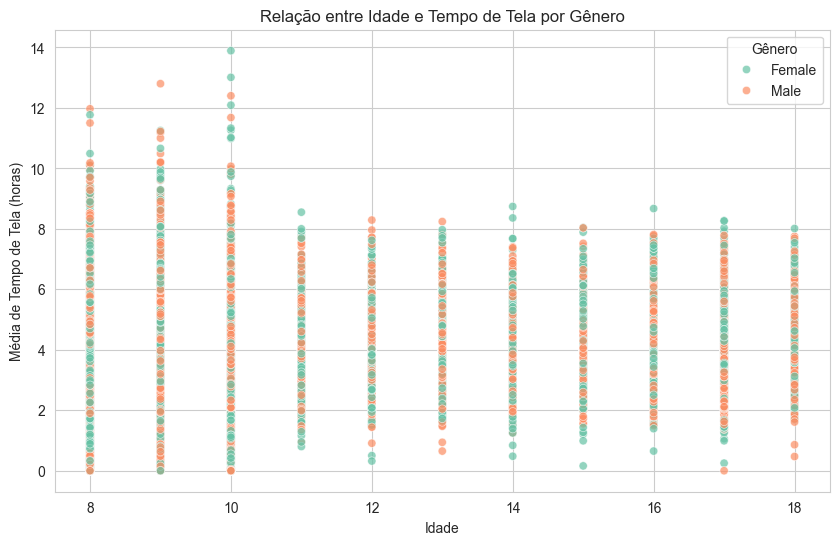

In [34]:
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', hue='Gender', data=df, alpha=0.7, palette='Set2')
plt.title('Relação entre Idade e Tempo de Tela por Gênero')
plt.xlabel('Idade')
plt.ylabel('Média de Tempo de Tela (horas)')
plt.legend(title='Gênero')
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv('Indian_Kids_Screen_Time.csv')
print("--- Informações do DataFrame ---")
df.info()

--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [40]:
print("\n--- Contagem de Valores Nulos ---")
print(df.isnull().sum())


--- Contagem de Valores Nulos ---
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [42]:
# Substituir valores 'None' por 'No Impact' para facilitar a contagem
df['Health_Impacts'] = df['Health_Impacts'].fillna('No Impact')
print("\n--- Contagem de Valores Nulos ---")
print(df.isnull().sum())


--- Contagem de Valores Nulos ---
Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


In [43]:
health_impacts_dummies = df['Health_Impacts'].str.get_dummies(sep=', ')
df = pd.concat([df, health_impacts_dummies], axis=1)
new_columns = {col: col.replace(' ', '') for col in health_impacts_dummies.columns}
df.rename(columns=new_columns, inplace=True)

In [46]:
age_bins = [7, 12, 15, 18]
age_labels = ['8-12 anos', '13-15 anos', '16-18 anos']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df['Age_Group'] = df['Age_Group'].cat.add_categories('18-18 anos').fillna('18-18 anos')
print("--- Informações do DataFrame ---")
df.info()


--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int64   
 1   Gender                             9712 non-null   object  
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64 
 3   Primary_Device                     9712 non-null   object  
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float64 
 6   Health_Impacts                     9712 non-null   object  
 7   Urban_or_Rural                     9712 non-null   object  
 8   Anxiety                            9712 non-null   int64   
 9   EyeStrain                          9712 non-null   int64   
 10  NoImpact                           9712 non-null   int64   
 11  ObesityRis


--- Tempo Médio de Tela por Faixa Etária (em horas) ---
Age_Group
13-15 anos    4.522926
16-18 anos    4.517270
18-18 anos    4.503976
8-12 anos     4.065031
Name: Avg_Daily_Screen_Time_hr, dtype: float64


C:\Users\gomes\AppData\Local\Temp\ipykernel_13512\1989773292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_screen_time = df.groupby('Age_Group')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False)
C:\Users\gomes\AppData\Local\Temp\ipykernel_13512\1989773292.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_screen_time.index, y=age_screen_time.values, palette='coolwarm')


Text(0.5, 1.0, 'Tempo Médio de Tela por Faixa Etária')

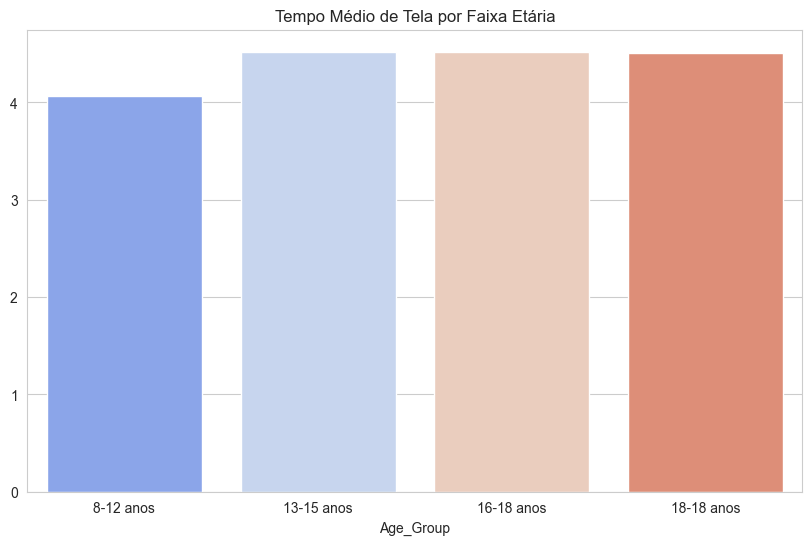

In [48]:
# Tempo médio de tela por faixa etária
age_screen_time = df.groupby('Age_Group')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False)
print("\n--- Tempo Médio de Tela por Faixa Etária (em horas) ---")
print(age_screen_time)
# Gráfico de barras para o tempo médio de tela por faixa etária
sns.barplot(x=age_screen_time.index, y=age_screen_time.values, palette='coolwarm')
plt.title('Tempo Médio de Tela por Faixa Etária') 

In [72]:
# Tempo médio de tela por gênero
gender_screen_time = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean()
print("\n--- Tempo Médio de Tela por Gênero (em horas) ---")
print(gender_screen_time)




--- Tempo Médio de Tela por Gênero (em horas) ---
Gender
Female    4.327021
Male      4.377754
Name: Avg_Daily_Screen_Time_hr, dtype: float64



--- Principais Impactos na Saúde ---
Poor Sleep      4868
No Impact       3218
Eye Strain      2382
Anxiety         1605
Obesity Risk    1217
dtype: int64


C:\Users\gomes\AppData\Local\Temp\ipykernel_13512\3746520893.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impact_counts.index, y=impact_counts.values, palette='coolwarm')


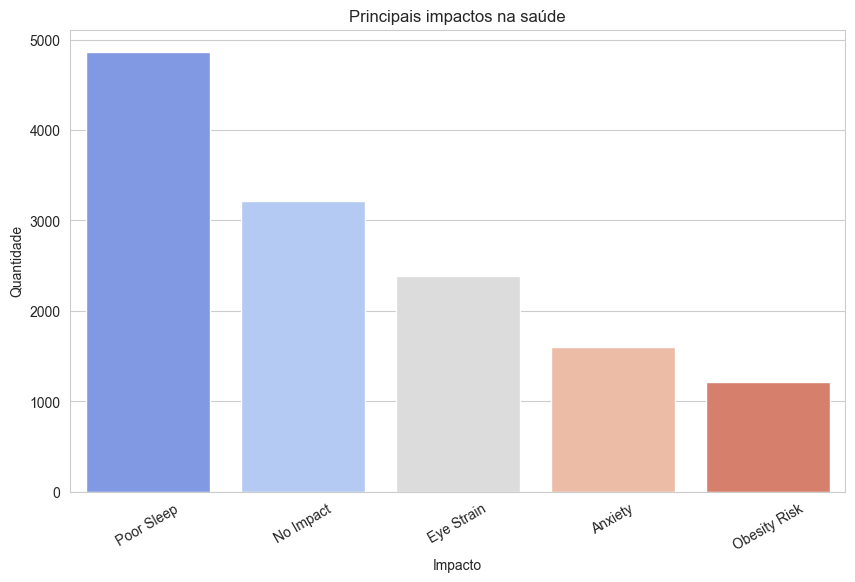

In [53]:
# Principais impactos na saúde
impact_counts = health_impacts_dummies.sum().sort_values(ascending=False)
print("\n--- Principais Impactos na Saúde ---")
print(impact_counts)

# Gráfico de barras para os principais impactos na saúde
sns.barplot(x=impact_counts.index, y=impact_counts.values, palette='coolwarm')
plt.title('Principais impactos na saúde')
plt.ylabel('Quantidade')
plt.xlabel('Impacto')
plt.xticks(rotation=30)
plt.show()

In [54]:
# Porcentagem de indivíduos que excedem o limite
exceeded_limit_count = df['Exceeded_Recommended_Limit'].value_counts(normalize=True) * 100
print("\n--- Porcentagem que Excede o Limite Recomendado ---")
print(exceeded_limit_count)


--- Porcentagem que Excede o Limite Recomendado ---
Exceeded_Recommended_Limit
True     85.471582
False    14.528418
Name: proportion, dtype: float64


In [71]:
# Análise de impactos por faixa etária
impact_cols = list(new_columns.values())
impacts_by_age_group = df.groupby('Age_Group')[impact_cols].sum()
print("\n--- Impactos na Saúde por Faixa Etária ---")
print(impacts_by_age_group)



--- Impactos na Saúde por Faixa Etária ---
            Anxiety  EyeStrain  NoImpact  ObesityRisk  PoorSleep
Age_Group                                                       
8-12 anos       445        696      1575          365       1481
13-15 anos      495        724       701          400       1482
16-18 anos      498        721       723          341       1457
18-18 anos      167        241       219          111        448


C:\Users\gomes\AppData\Local\Temp\ipykernel_13512\2126626871.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impacts_by_age_group = df.groupby('Age_Group')[impact_cols].sum()


In [70]:
#analise de impactos por faixa etária em porcentagem
impact_cols = ['Anxiety', 'EyeStrain', 'ObesityRisk', 'PoorSleep']


impacts_by_age_group = df.groupby('Age_Group')[impact_cols].sum()

impacts_by_age_group_pct = impacts_by_age_group.div(impacts_by_age_group.sum(axis=1), axis=0) * 100

print("\n--- Impactos na Saúde por Faixa Etária (em %) ---")
print(impacts_by_age_group_pct)



--- Impactos na Saúde por Faixa Etária (em %) ---
              Anxiety  EyeStrain  ObesityRisk  PoorSleep
Age_Group                                               
8-12 anos   14.897891  23.300971    12.219618  49.581520
13-15 anos  15.962593  23.347307    12.899065  47.791035
16-18 anos  16.506463  23.897912    11.302618  48.293006
18-18 anos  17.269907  24.922441    11.478800  46.328852


C:\Users\gomes\AppData\Local\Temp\ipykernel_13512\97012061.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impacts_by_age_group = df.groupby('Age_Group')[impact_cols].sum()


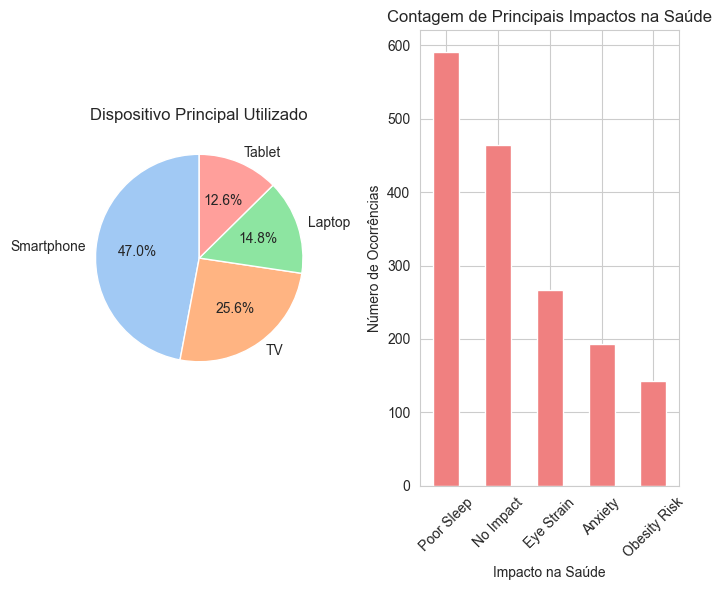

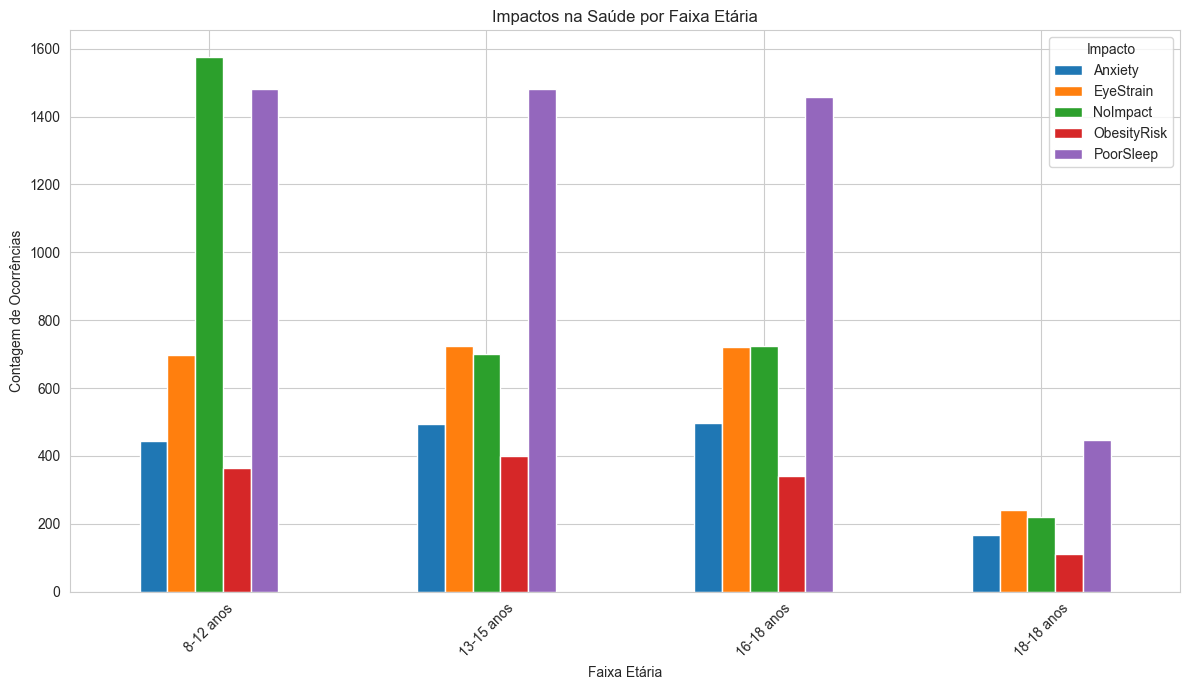

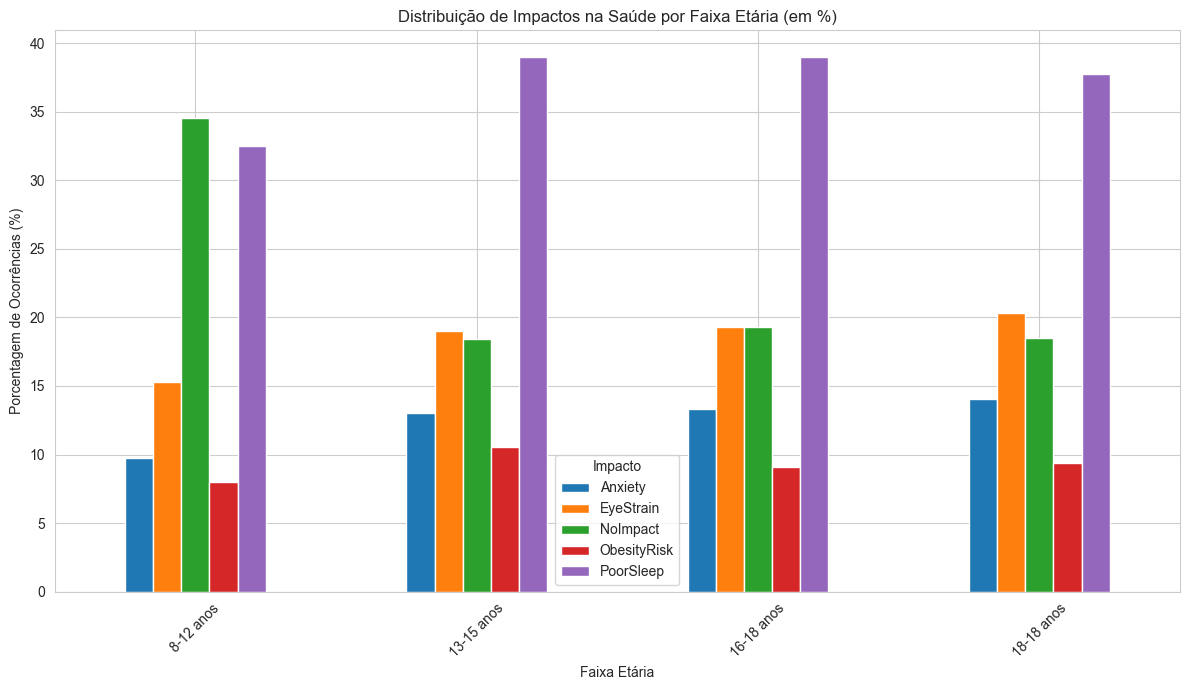

In [75]:
# Gráfico de pizza de dispositivos
plt.subplot(1, 3, 2)
device_counts = df['Primary_Device'].value_counts()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Dispositivo Principal Utilizado')
plt.ylabel('')

# Gráfico de barras dos principais impactos na saúde
plt.subplot(1, 3, 3)
impact_counts.plot(kind='bar', color='lightcoral')
plt.title('Contagem de Principais Impactos na Saúde')
plt.xlabel('Impacto na Saúde')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Gráfico de barras de impactos na saúde por faixa etária
impacts_by_age_group.plot(kind='bar', figsize=(12, 7))
plt.title('Impactos na Saúde por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Ocorrências')
plt.xticks(rotation=45)
plt.legend(title='Impacto')
plt.tight_layout()
plt.show()

impacts_by_age_group_pct = impacts_by_age_group.div(impacts_by_age_group.sum(axis=1), axis=0) * 100

# 3. Cria o gráfico de barras
impacts_by_age_group_pct.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Distribuição de Impactos na Saúde por Faixa Etária (em %)')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem de Ocorrências (%)')
plt.xticks(rotation=45)
plt.legend(title='Impacto')
plt.tight_layout()
plt.show()


--- Principais Impactos na Saúde (Usuários de Smartphone) ---
PoorSleep      2306
EyeStrain      1173
Anxiety         743
ObesityRisk     612
dtype: int64

--- Distribuição de Impactos (em %) para Usuários de Smartphone ---
PoorSleep      47.703765
EyeStrain      24.265619
Anxiety        15.370294
ObesityRisk    12.660323
dtype: float64


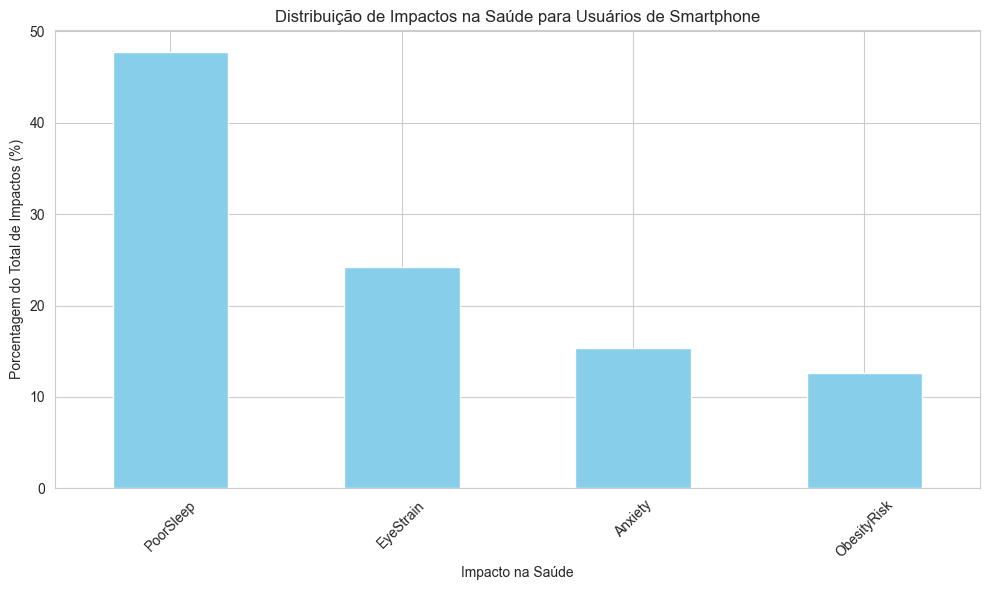

In [ ]:
#grupo que usa Smartphone
df_smartphone = df[df['Primary_Device'] == 'Smartphone'].copy()

impact_cols = ['Anxiety', 'EyeStrain', 'ObesityRisk', 'PoorSleep']
impacts_smartphone = df_smartphone[impact_cols].sum()

print("\n--- Principais Impactos na Saúde (Usuários de Smartphone) ---")
print(impacts_smartphone.sort_values(ascending=False))

total_impacts = impacts_smartphone.sum()
impacts_smartphone_pct = (impacts_smartphone / total_impacts) * 100

print("\n--- Distribuição de Impactos (em %) para Usuários de Smartphone ---")
print(impacts_smartphone_pct.sort_values(ascending=False))


plt.figure(figsize=(10, 6))
impacts_smartphone_pct.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribuição de Impactos na Saúde para Usuários de Smartphone')
plt.xlabel('Impacto na Saúde')
plt.ylabel('Porcentagem do Total de Impactos (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

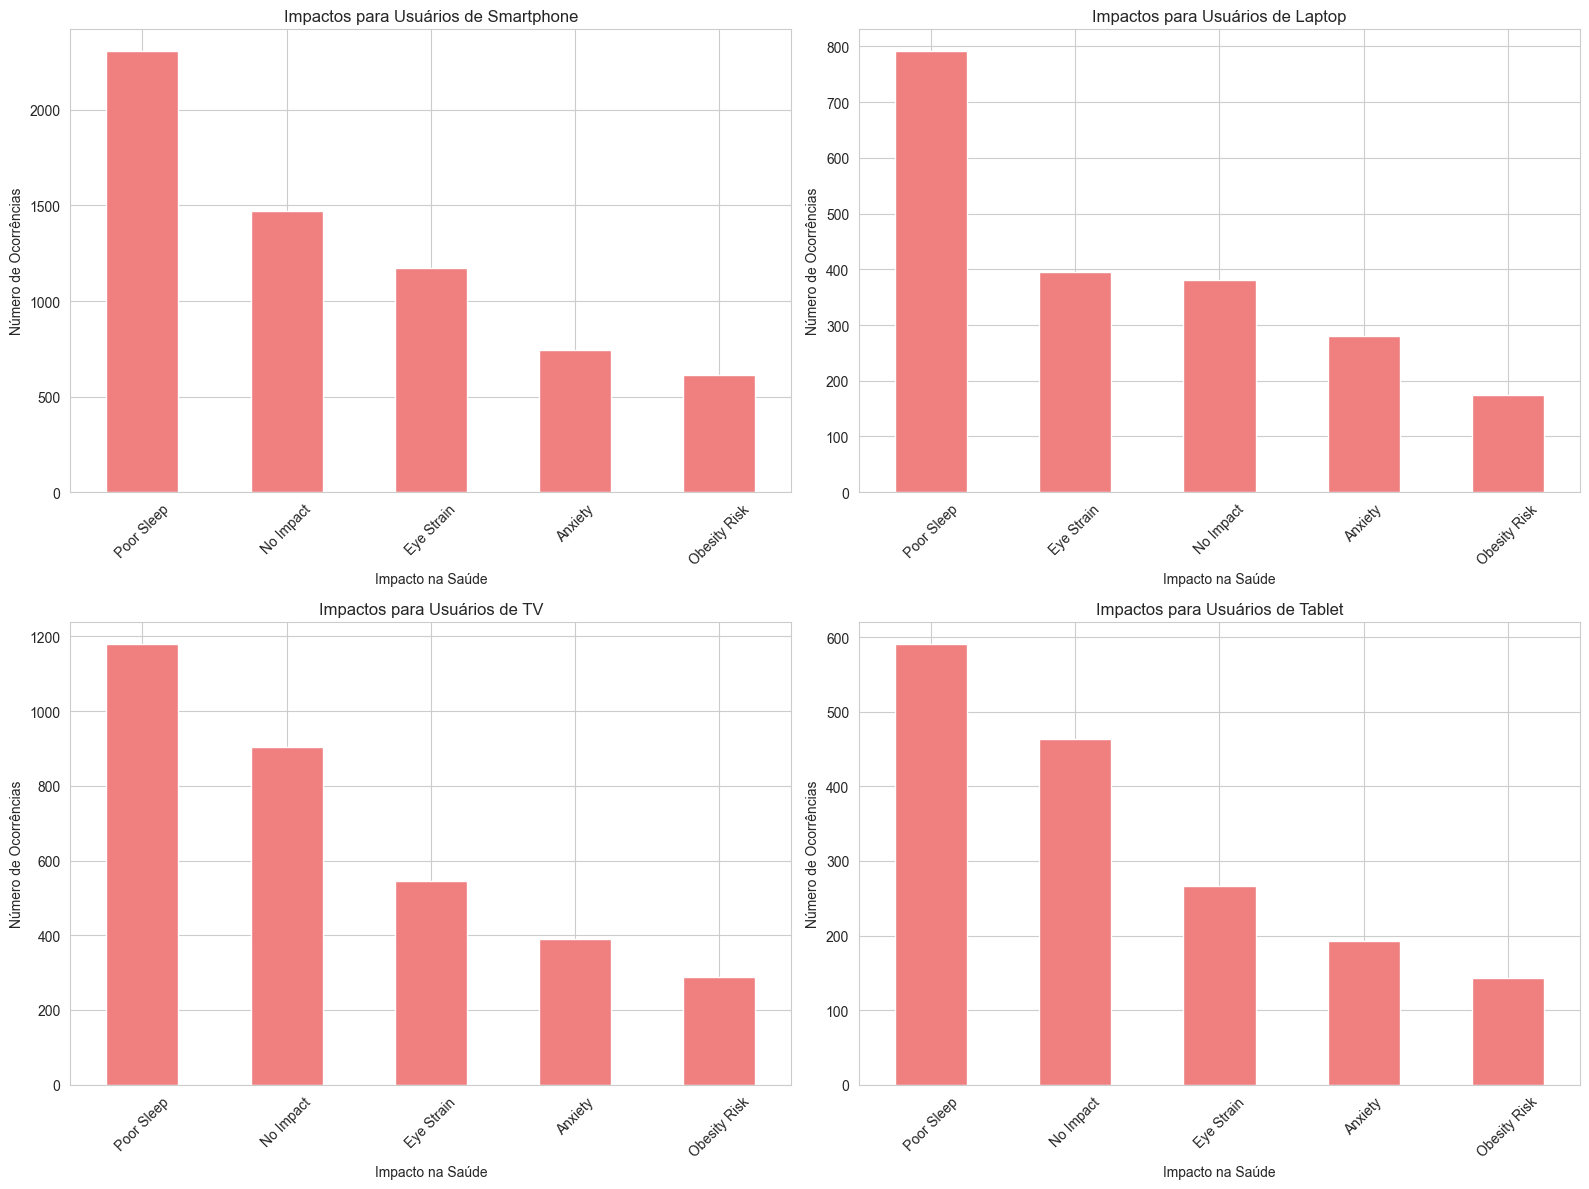

In [69]:
# Lista de dispositivos únicos
dispositivos = df['Primary_Device'].unique()


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() 


for i, dispositivo in enumerate(dispositivos):
   
    df_device = df[df['Primary_Device'] == dispositivo].copy()
    
    df_device['Health_Impacts'] = df_device['Health_Impacts'].fillna('No Impact')
    
    all_impacts = df_device['Health_Impacts'].str.get_dummies(sep=', ')
    impact_counts = all_impacts.sum().sort_values(ascending=False)
    
    impact_counts.plot(kind='bar', ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Impactos para Usuários de {dispositivo}')
    axes[i].set_xlabel('Impacto na Saúde')
    axes[i].set_ylabel('Número de Ocorrências')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

--- Porcentagem de Usuários com Impacto, por Dispositivo ---
                Total de Usuários  Usuários com Impacto  \
Primary_Device                                            
Laptop                       1433                  1053   
Smartphone                   4568                  3098   
TV                           2487                  1583   
Tablet                       1224                   760   

                Porcentagem com Impacto (%)  
Primary_Device                               
Laptop                                73.48  
Smartphone                            67.82  
TV                                    63.65  
Tablet                                62.09  


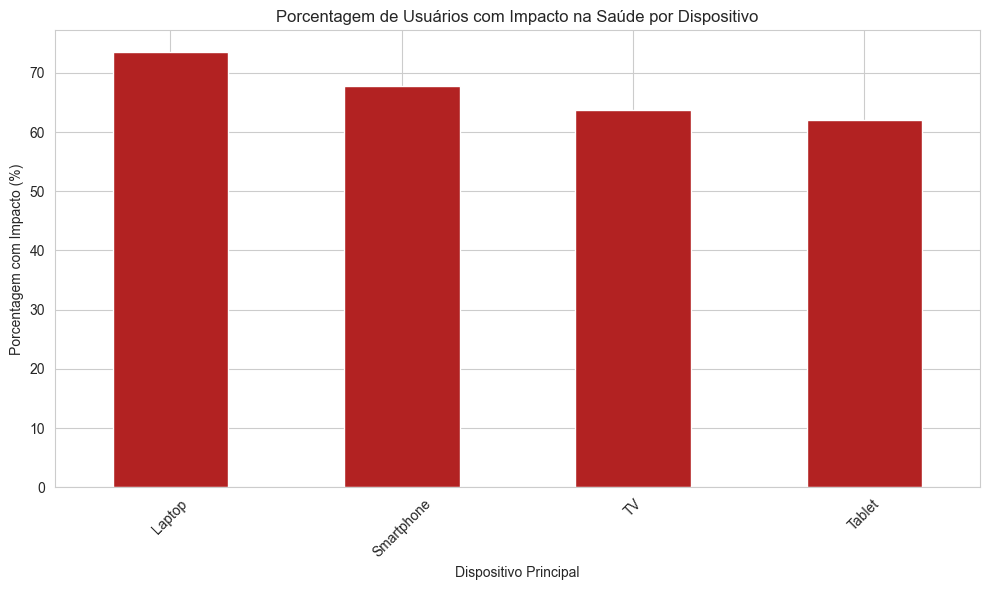

In [79]:
# 1. Conta o número total de usuários por dispositivo
total_usuarios_por_dispositivo = df['Primary_Device'].value_counts()

# 2. Conta o número de usuários que TIVERAM IMPACTO (excluindo 'No Impact')
usuarios_com_impacto = df[df['Health_Impacts'] != 'No Impact']
impactos_por_dispositivo = usuarios_com_impacto['Primary_Device'].value_counts()

# 3. Combina as duas séries e calcula a porcentagem
relatorio_impactos = pd.DataFrame({
    'Total de Usuários': total_usuarios_por_dispositivo,
    'Usuários com Impacto': impactos_por_dispositivo
}).fillna(0)

# Calcula a porcentagem de usuários com impacto em relação ao total de usuários daquele dispositivo
relatorio_impactos['Porcentagem com Impacto (%)'] = (relatorio_impactos['Usuários com Impacto'] / relatorio_impactos['Total de Usuários']) * 100

# Exibe o resultado final, ordenado pela porcentagem de impacto
print("--- Porcentagem de Usuários com Impacto, por Dispositivo ---")
print(relatorio_impactos.sort_values('Porcentagem com Impacto (%)', ascending=False).round(2))

# Gera o gráfico de barras
plt.figure(figsize=(10, 6))
relatorio_impactos.sort_values('Porcentagem com Impacto (%)', ascending=False)['Porcentagem com Impacto (%)'].plot(kind='bar', color='firebrick')
plt.title('Porcentagem de Usuários com Impacto na Saúde por Dispositivo')
plt.xlabel('Dispositivo Principal')
plt.ylabel('Porcentagem com Impacto (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()